<a href="https://colab.research.google.com/github/shashwat2820/python-codes/blob/main/stackoverflow_developer_survey_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade


In [2]:
import opendatasets as od 
od.download('stackoverflow-developer-survey-2020')

94609408it [00:01, 73872886.12it/s]                               


16384it [00:00, 99252.39it/s]           


8192it [00:00, 62884.55it/s]            


In [3]:
import pandas as pd 
import os 
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_schema.csv', 'survey_results_public.csv']

In [4]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [5]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [6]:
survey_raw_df.columns 

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
# creating a Series object with 'Column' as the key and 'QuestionText' as the value  
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname , index_col = 'Column').QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We need to concentrate our analysis to the following key components of the data:
1. The demographical distribution
2. The distribution of programming skills and preferences 
3. employment related Information


In [8]:
selected_cols = [# Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt']

In [9]:
len(selected_cols)

20

In [10]:
# create a copy of the original data frame consisting of the selcted columns so that the changes done on the copy dataframe do not affect the original dataframe 
survey_df = survey_raw_df[selected_cols].copy()
schema = schema_raw[selected_cols]
schema


Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [11]:
survey_df.shape

(64461, 20)

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [13]:
# converting some columns into numeric data type 
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode , errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode , errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro , errors = 'coerce')

In [14]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [15]:
# dropping rows of data that give ambiguous values
survey_df.drop(survey_df[survey_df.Age < 10].index , inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index , inplace = True)

In [16]:
# dropping rows of data that give ambiguos values 

survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index , inplace= True)


In [17]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [18]:
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [19]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
2717,United States,41.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,34.0,20.0,HTML/CSS;JavaScript;Python;Ruby,HTML/CSS;JavaScript;Ruby,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, full-stack;Developer, mobile",60.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Fairly important
37492,Pakistan,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,8.0,2.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP,NaN,Once every few years,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Database administrator;Developer, back-end;Dev...",38.0,Very satisfied,NaN,Often: 1-2 days per week or more,Not at all important/not necessary
10346,United Kingdom,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,7.0,3.0,C#;HTML/CSS;Java;JavaScript;PHP;Python;SQL;Typ...,C#;HTML/CSS;JavaScript;SQL;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;Developer, game or graphics",37.5,Very satisfied,Industry that I’d be working in;Flex time or a...,Occasionally: 1-2 days per quarter but less th...,Very important
7220,France,40.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,21.0,19.0,16.0,Bash/Shell/PowerShell;Java;JavaScript;Scala;SQ...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once a year,Visit Stack Overflow,Employed full-time,"Developer, desktop or enterprise applications;...",41.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Very important
47794,Israel,68.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,27.0,42.0,40.0,HTML/CSS;SQL;VBA,HTML/CSS;SQL;VBA,NaN,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,NaN,40.0,Very satisfied,Remote work options;Opportunities for professi...,Never,Critically important
60964,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
38703,Egypt,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;Java;R,C;C#;C++;Kotlin;Python,Once a year,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
41305,Czech Republic,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,5.0,4.0,NaN,NaN,NaN,NaN,Employed part-time,"Developer, back-end",NaN,Slightly dissatisfied,NaN,NaN,Fairly important
39573,Kenya,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,3.0,NaN,Assembly;Bash/Shell/PowerShell;C;HTML/CSS;Java...,C#;C++;R,Every few months,Visit Stack Overflow,"Not employed, but looking for work","Developer, full-stack",NaN,NaN,Financial performance or funding status of the...,NaN,NaN
20688,India,32.0,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,9.0,5.0,HTML/CSS;Java;Objective-C;Swift,Go;JavaScript;Kotlin;Python;Ruby,Once a decade,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",45.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important


In [20]:
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [21]:
schema.Country

'Where do you live?'

In [22]:
survey_df.Country.nunique()

183

In [23]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries 

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

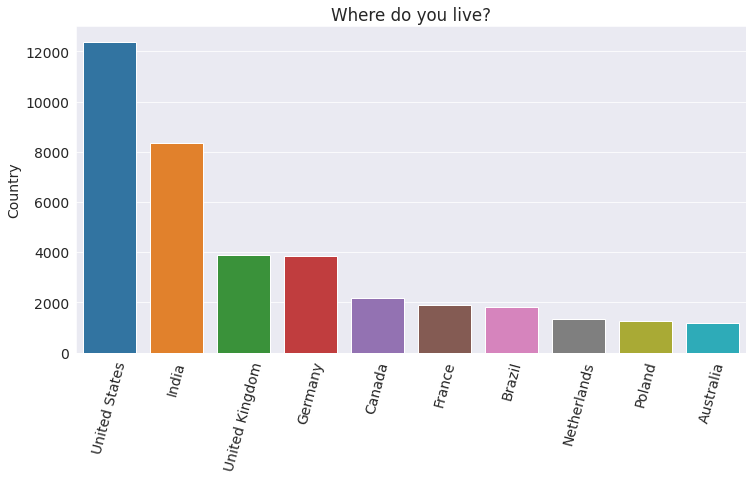

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(x = top_countries.index , y = top_countries)

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 13 Patch objects>)

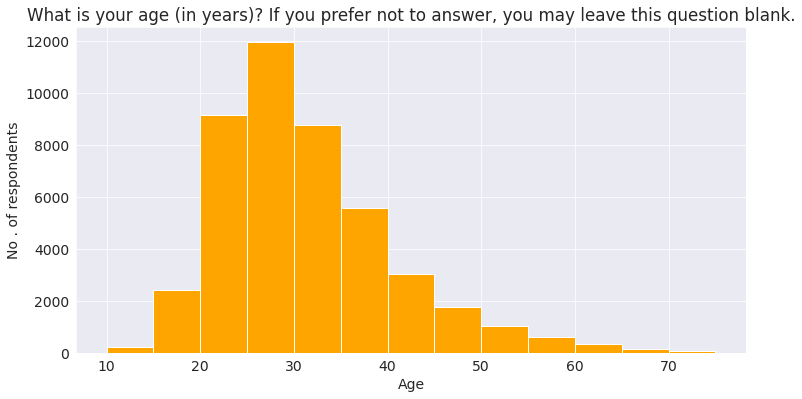

In [25]:
# plotitng the age 

plt.figure(figsize = (12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('No . of respondents')

plt.hist(survey_df.Age , bins = np.arange(10,80,5) , color = 'orange')


In [26]:
# question asked on the survey regarding the gender

schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [27]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

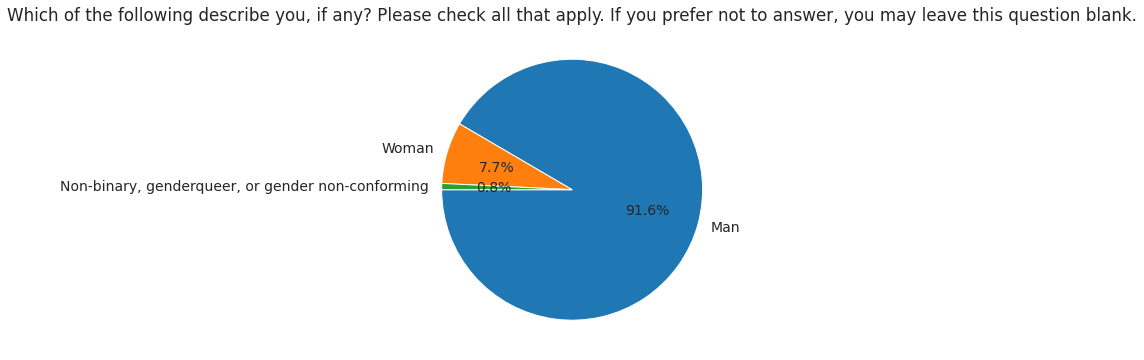

In [28]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts , labels = gender_counts.index , autopct ="%1.1f%%" , startangle = 180) ;


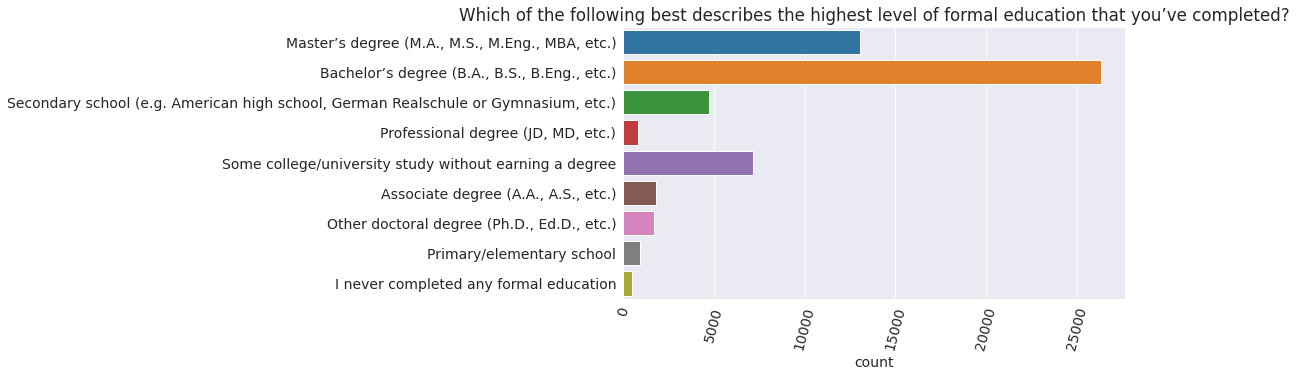

In [29]:
#eduaction level
sns.countplot(y = survey_df.EdLevel)
plt.xticks(rotation = 75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [30]:
schema.UndergradMajor

'What was your primary field of study?'

Text(0, 0.5, 'Percentage')

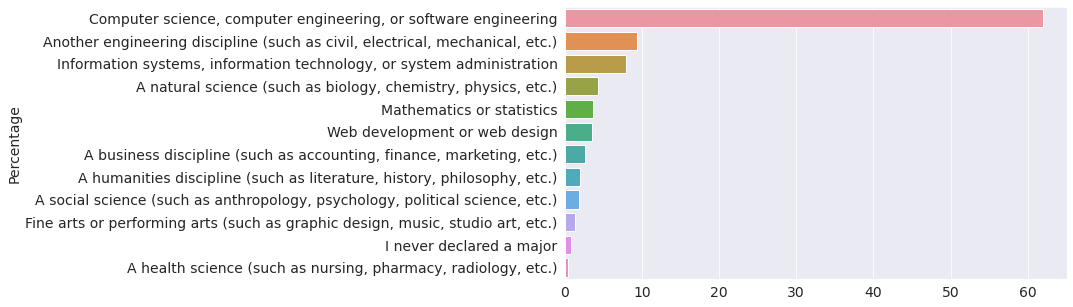

In [31]:
undergrad_per = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

sns.barplot(x = undergrad_per , y = undergrad_per.index)

plt.xlabel(None)
plt.ylabel('Percentage')

Text(0.5, 0, 'Employment')

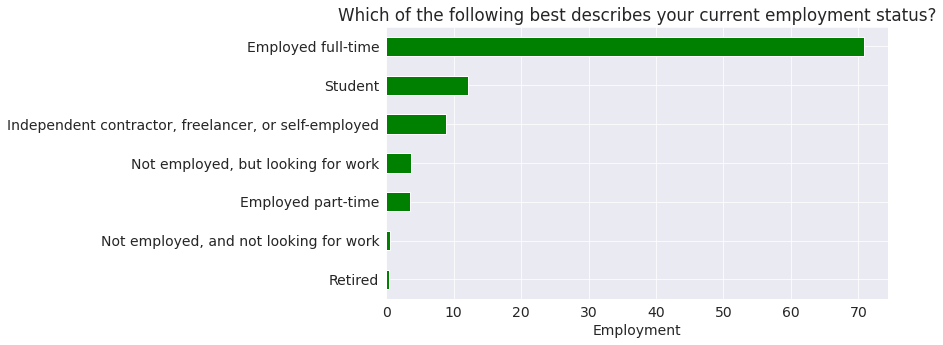

In [32]:
# Employment 

(survey_df.Employment.value_counts(normalize = True , ascending = True)*100).plot(kind = 'barh' , color = 'g')
plt.title(schema.Employment)
plt.xlabel("Employment")

In [33]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [34]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                          4396
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                            3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                  

In [35]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [36]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [37]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Answering questions based on our EDA 

In [39]:
#What are the most popular programming languages in 2020?

survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [40]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,C,TypeScript,Bash/Shell/PowerShell,Kotlin,R,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

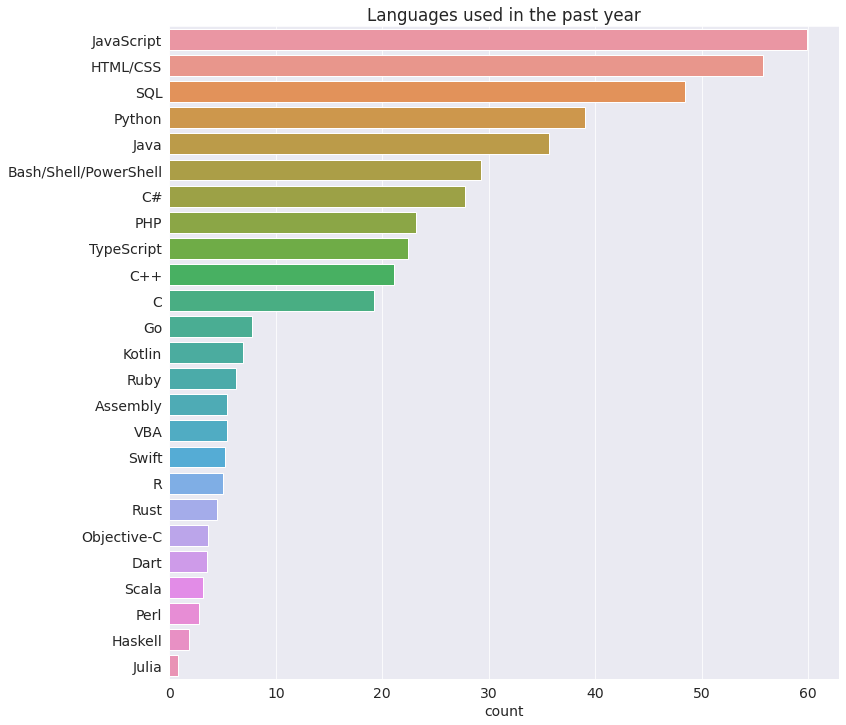

In [42]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

In [44]:
# Which languages are the most people interested to learn over the next year?
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

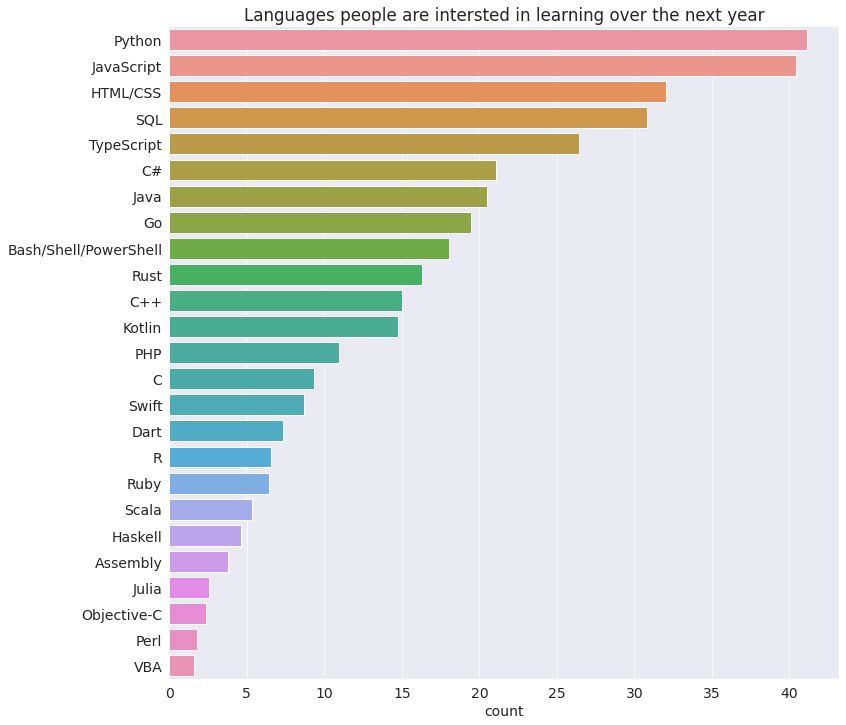

In [45]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

In [46]:
# Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

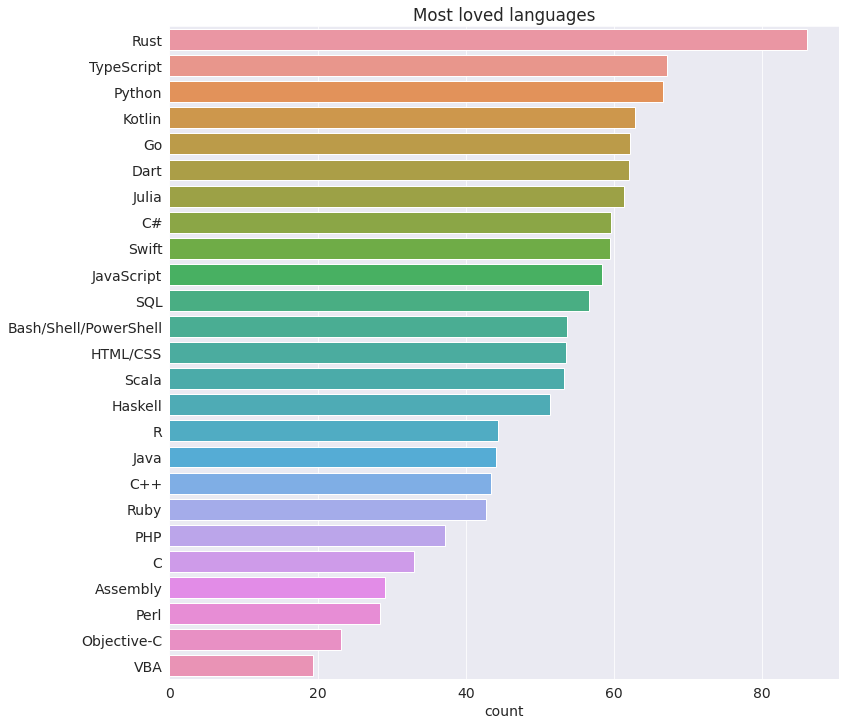

In [47]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');


In [ ]:
# In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [48]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [49]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


In [50]:
#How important is it to start young to build a career in programming?

schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

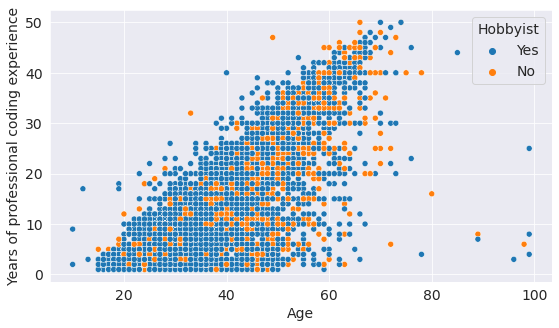

In [51]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

In [ ]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);